अगर आपको future values (जैसे 45) predict करनी हैं, तो:

Polynomial Regression use मत करो।

Instead → Exponential Regression, Linear Trend, या Time Series methods (ARIMA, Prophet) use करो।

अगर सिर्फ छोटे range (1–9 के बीच) में prediction चाहिए, तो Polynomial ठीक है।

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv(r"E:\tops\Data science\practical\Regression\salary_data.csv")
dataset.head(4)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0


In [155]:
dataset=pd.read_csv(r"E:\tops\Data science\practical\Regression\realistic_salary_level.csv")
dataset.head(3)

,level,salary
0,1,33973.71
1,2,38893.89
2,3,55181.51


In [156]:
dataset.isnull().sum()

level     0
salary    0
dtype: int64

In [157]:
dataset.shape

(200, 2)

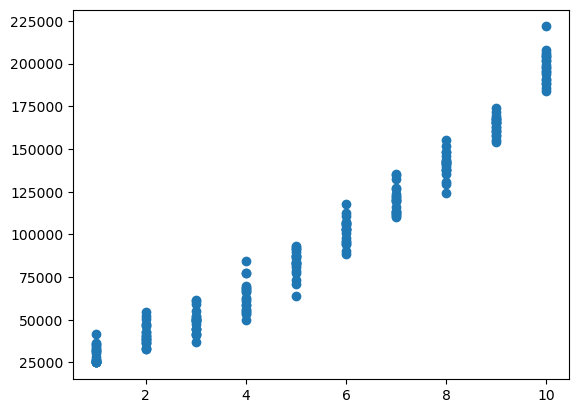

In [158]:
plt.scatter(dataset["level"],dataset["salary"])
plt.show()

In [159]:
dataset.corr()

,level,salary
level,1.000000,0.978599
salary,0.978599,1.000000


In [208]:
x=dataset[["level"]]
y=dataset[["salary"]]


In [161]:
x.shape

(200, 1)

In [162]:
from sklearn.preprocessing import PolynomialFeatures

In [209]:
pf=PolynomialFeatures(degree=3)

In [210]:
pf.fit(x)

PolynomialFeatures(degree=3)

In [211]:
x = pf.transform(x)

In [122]:
from sklearn.model_selection import train_test_split

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=52)

In [213]:

x_train.shape

(160, 4)

In [168]:
from sklearn.linear_model import LinearRegression

In [214]:
lr =LinearRegression()

In [215]:
lr.fit(x_train,y_train)

LinearRegression()

In [216]:
lr.score(x_test,y_test)*100

98.35395766069361

In [217]:
prd=lr.predict(x)

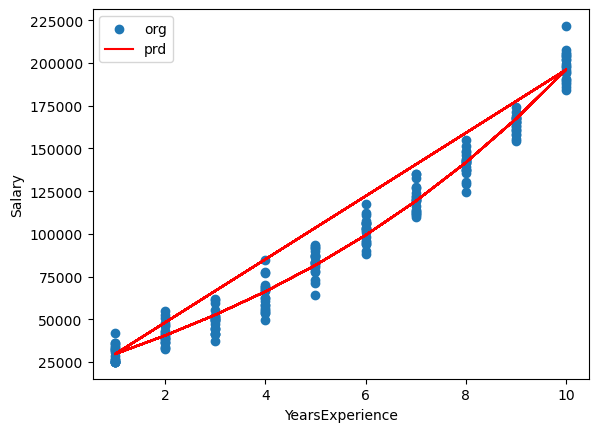

In [218]:
plt.scatter(dataset["level"],dataset["salary"])
plt.plot(dataset["level"],prd,c="red")

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend(["org","prd"])
plt.show()

In [222]:
test=pf.transform([[45]])

E:\app\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [223]:
lr.predict(test)

array([[5452348.25894532]])